In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import spicy.stats as sts
income_df = pd.read_csv("household_median_income_2017.csv")
income_df = income_df.dropna(how='any')

#excluting Nebraska & United States rows to match the Zillow df. Puerto Rico was not in csv file. 
income_df = income_df.loc[income_df['State']!= 'Nebraska']
income_df = income_df.loc[income_df['State']!= 'United States'].reset_index(drop=True)
income_df = income_df[['State','2017', '2016']]
income_df.head()

,State,2017,2016
0,Alabama,"51,113","48,237"
1,Alaska,"72,231","77,351"
2,Arizona,"61,125","58,328"
3,Arkansas,"48,829","46,894"
4,California,"69,759","68,070"


In [2]:
sorted_2016 = income_df.sort_values('2016', ascending = False).drop(columns ='2017').reset_index(drop = True)
sorted_2017 = income_df.sort_values('2017', ascending = False).drop(columns = '2016').reset_index(drop = True)

median_income_2016 = [round(year/1000,2) for year in sorted_2016['2016'].str.replace(',', '').astype(float)]
median_income_2017 = [round(year/1000,2)for year in sorted_2017['2017'].str.replace(',', '').astype(float)]

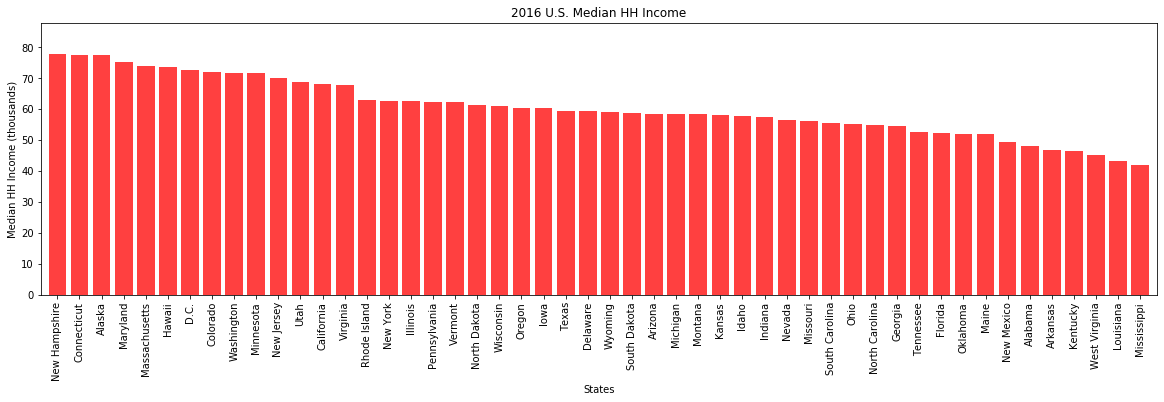

In [12]:
plt.figure(figsize=(20,5))

x_axis = [x for x in sorted_2016['State']]
plt.bar(x_axis, median_income_2016, color = 'red', alpha = 0.75, align = 'center')

plt.xticks(rotation = 'vertical')

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(median_income_2016)+10)

plt.xlabel('States')
plt.ylabel('Median HH Income (thousands)')
plt.title('2016 U.S. Median HH Income')

plt.show()

Text(0.5, 1.0, '2017 U.S. Median HH Income by State')

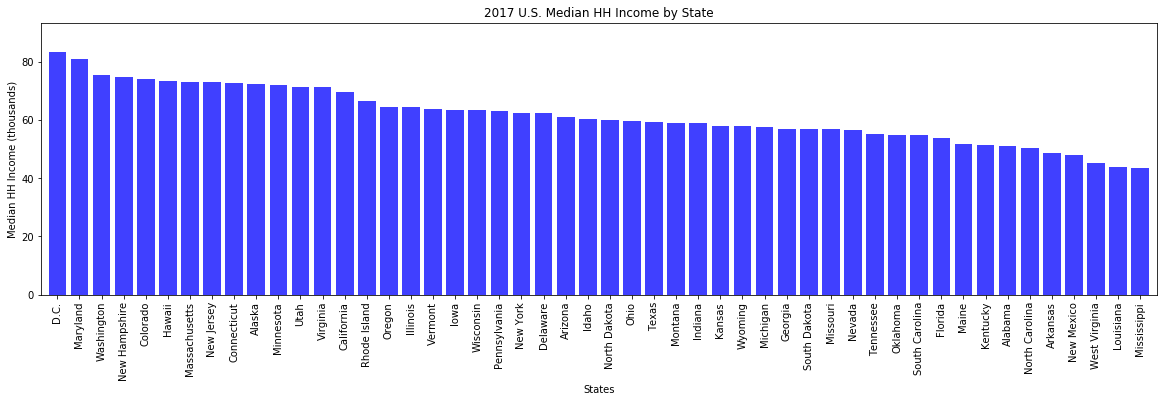

In [4]:
plt.figure(figsize=(20,5))

x_axis2 = [x for x in sorted_2017['State']]
plt.bar(x_axis2, median_income_2017, color = 'blue', alpha = 0.75, align = 'center')
plt.xticks(rotation = 'vertical')

plt.xlim(-0.75, len(x_axis2)-0.25)
plt.ylim(0, max(median_income_2017)+10)

plt.xlabel('States')
plt.ylabel('Median HH Income (thousands)')
plt.title('2017 U.S. Median HH Income')

In [5]:
#Data Frame to be analyzed against Zillow Median Rent Price 
sorted_df = pd.merge(sorted_2017, sorted_2016, on ='State' )
sorted_df.head()

,State,2017,2016
0,D.C.,"83,382","72,508"
1,Maryland,"81,084","75,346"
2,Washington,"75,418","71,822"
3,New Hampshire,"74,801","77,900"
4,Colorado,"74,172","72,084"


In [6]:
#2016 Highest / Lowest Median HH Income Data Frames 
highest_income_2016 = sorted_2016.head(3)
print(f"{highest_income_2016}\n")
lowest_income_2016 = sorted_2016.tail(3)
print(f"{lowest_income_2016}\n")


#2017 Highest / Lowest Median HH Income Data Frames 
highest_income_2017 = sorted_2017.head(3)
print(f"{highest_income_2017}\n")
lowest_income_2017 = sorted_2017.tail(3)
print(f"{lowest_income_2017}\n")

print("The states with the highest median HH income in 2016 were: New Hampshire, Conneticut \nand Alaska. In 2017 they were D.C., Maryland \nand Washington.")
print("The states with the lowest median HH income in both 2016 & 2017 were: West Virginia, \nLousiana and Mississippi.")

           State    2016
0  New Hampshire  77,900
1    Connecticut  77,556
2         Alaska  77,351

            State    2016
47  West Virginia  45,308
48      Louisiana  43,103
49    Mississippi  41,983

        State    2017
0        D.C.  83,382
1    Maryland  81,084
2  Washington  75,418

            State    2017
47  West Virginia  45,392
48      Louisiana  43,903
49    Mississippi  43,441

The states with the highest median HH income in 2016 were: New Hampshire, Conneticut 
and Alaska. In 2017 they were D.C., Maryland 
and Washington.
The states with the lowest median HH income in both 2016 & 2017 were: West Virginia, 
Lousiana and Mississippi.


In [7]:
#reset index and covert years to float
sorted_df['2017'] = sorted_df['2017'].str.replace(',', '').astype(int)
sorted_df['2016'] = sorted_df['2016'].str.replace(',', '').astype(int)

The states that saw the highest median household income increase from 2016 to 2017 were:
 D.C., Maryland and Kentucky.


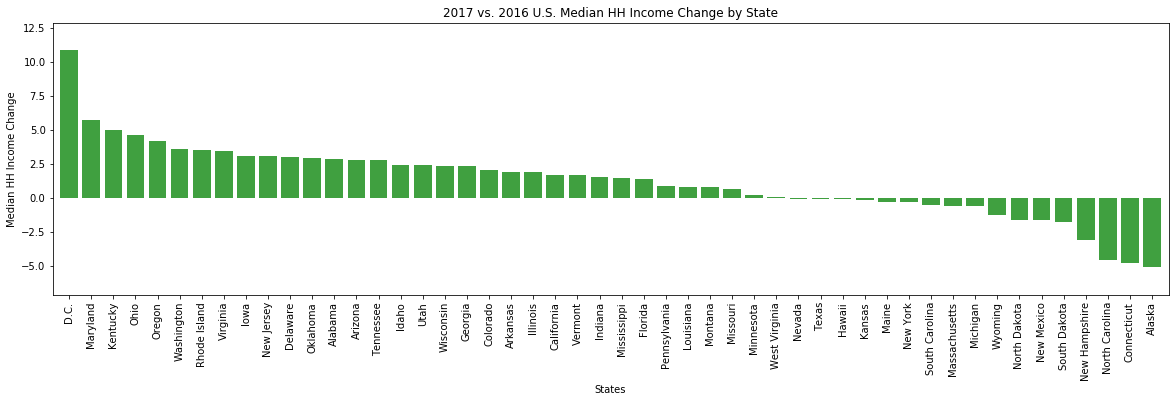

In [11]:
sorted_df['$ Chg']=sorted_df['2017']-sorted_df['2016']
sorted_df = sorted_df.sort_values('$ Chg',ascending = False)

income_change = [(dollar/1000) for dollar in sorted_df['$ Chg'].astype(int)]
states = [state for state in sorted_df['State']]
plt.figure(figsize=(20,5))

plt.bar(states, income_change, color = 'green', alpha = 0.75, align = 'center')
plt.xticks(rotation = 'vertical')

plt.xlim(-0.75, len(states)-0.25)
plt.ylim(min(income_change)-2, max(income_change)+2)

plt.xlabel('States')
plt.ylabel('Median HH Income Change')
plt.title('2017 vs. 2016 U.S. Median HH Income Change')

print('The states that saw the highest median household income increase from 2016 to 2017 were:\n D.C., Maryland and Kentucky.')
plt.show()